In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv('TSLA.csv')

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [14]:
df.shape

(2416, 7)

In [15]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

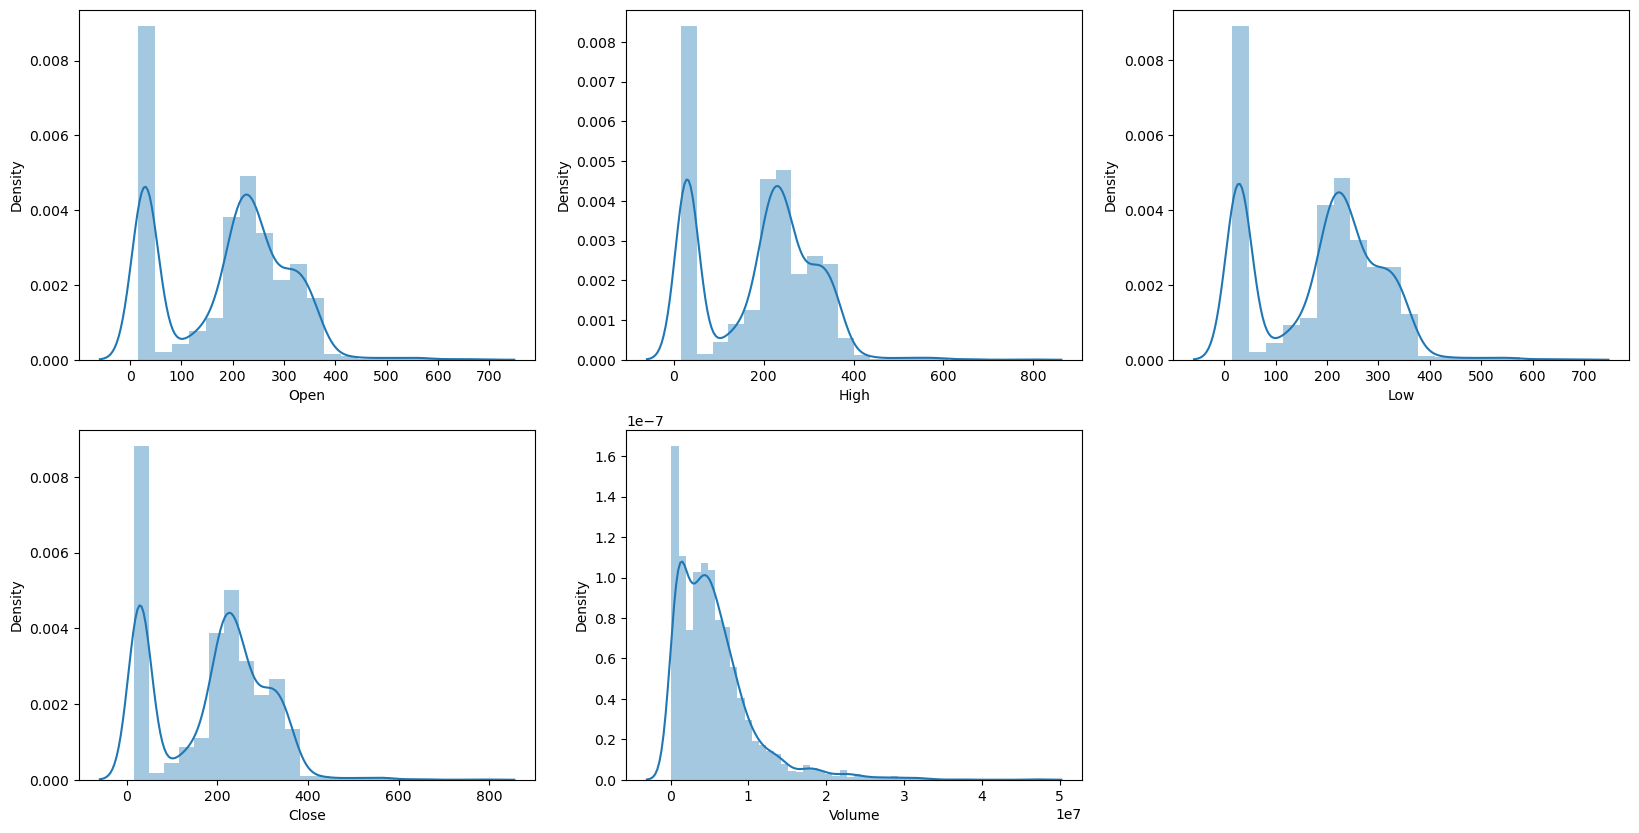

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.distplot(df[col])
plt.show()


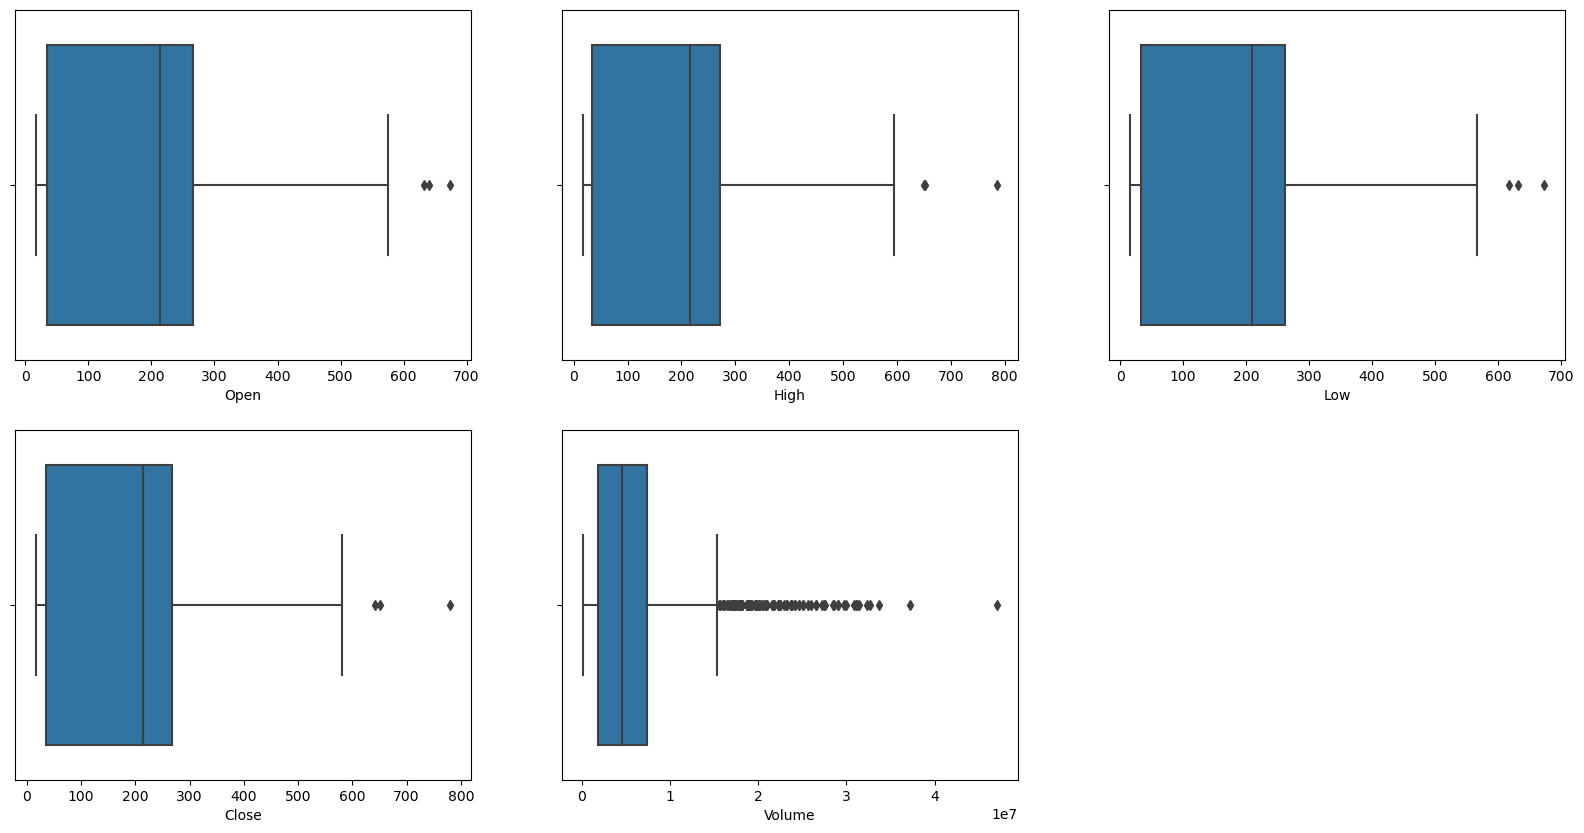

In [22]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [24]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010,6


In [25]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,1,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010,2,1
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010,6,1


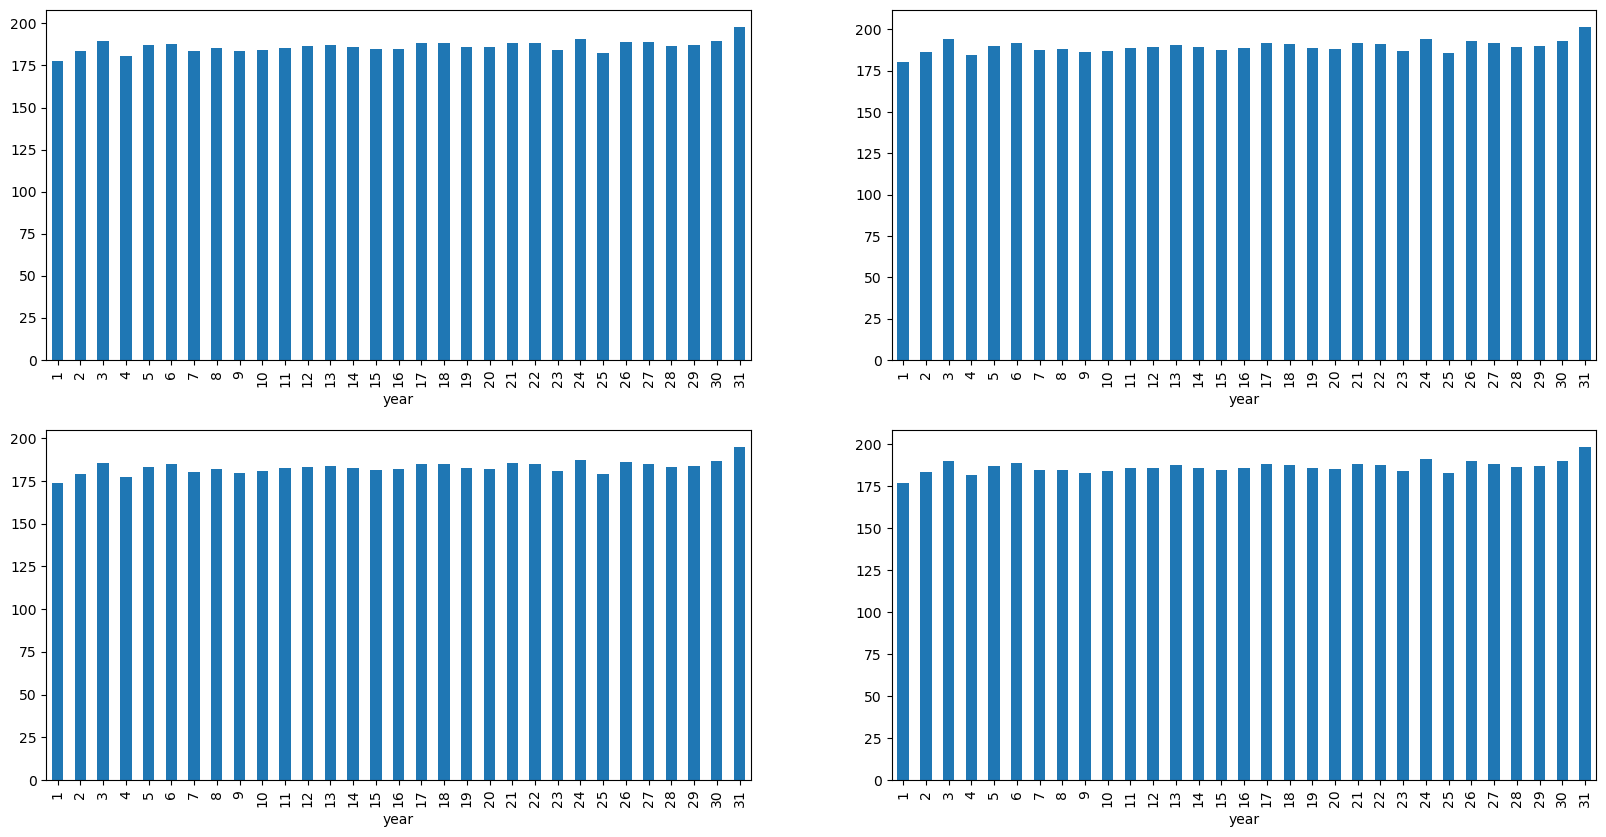

In [27]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [28]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,195.383850,198.830719,191.934386,195.566477,195.566477,5.012534e+06,6.455556,2014.578431,15.760784
1,170.534763,173.600440,167.344233,170.580711,170.580711,6.540089e+06,6.972912,2015.119639,15.726862


In [29]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

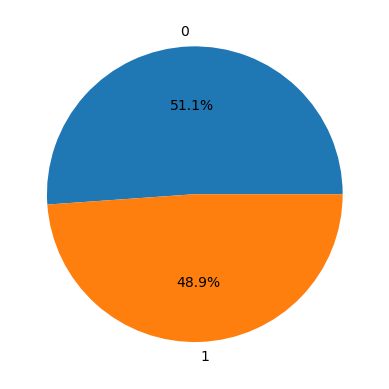

In [30]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

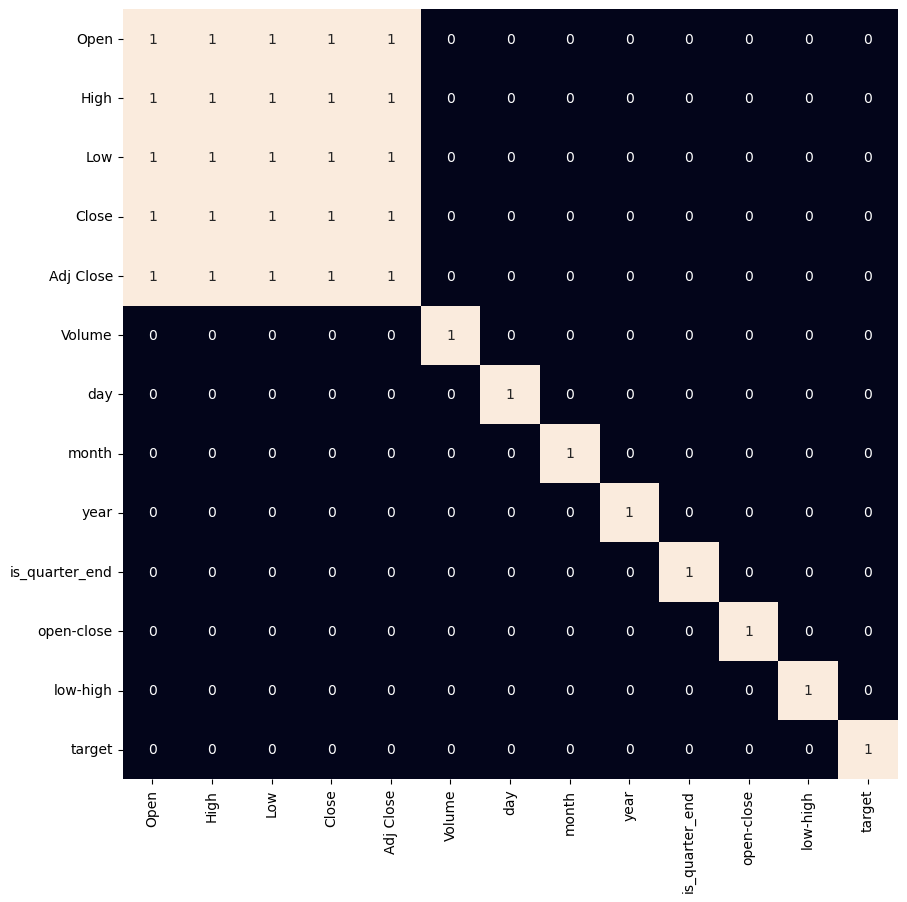

In [31]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [32]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


In [33]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5089337346592329
Validation Accuracy :  0.5124521072796935

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5165199795103654
Validation Accuracy :  0.4817323481116584

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

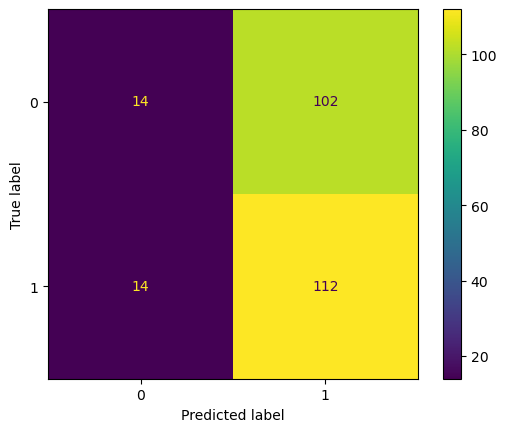

In [34]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()